In [2]:
# 📌 STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib  # For saving models


In [3]:
# 📌 STEP 2: Load Dataset
data=pd.read_excel("adult.xlsx")
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [10]:
data.duplicated().sum()
# to remove duplicates in data set :data.drop_duplicates(inplace=True)

52

In [11]:
print(data.workclass.value_counts().sort_values(ascending=False))

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [12]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_6420\4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [13]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [14]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_6420\1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


<Axes: xlabel='occupation'>

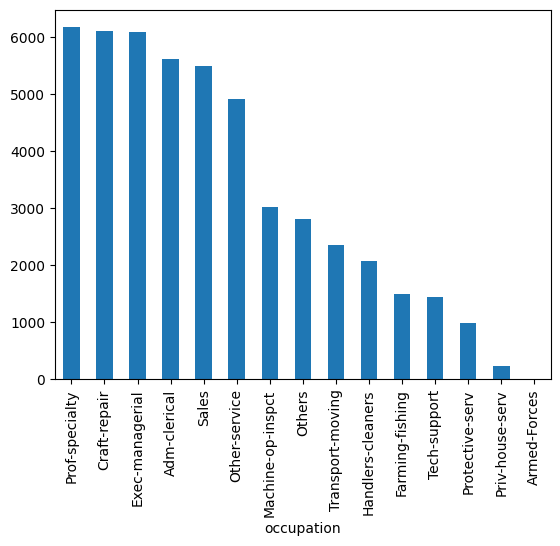

In [15]:
data.occupation.value_counts().sort_values(ascending=False).plot(kind="bar")

In [16]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


<Axes: xlabel='workclass'>

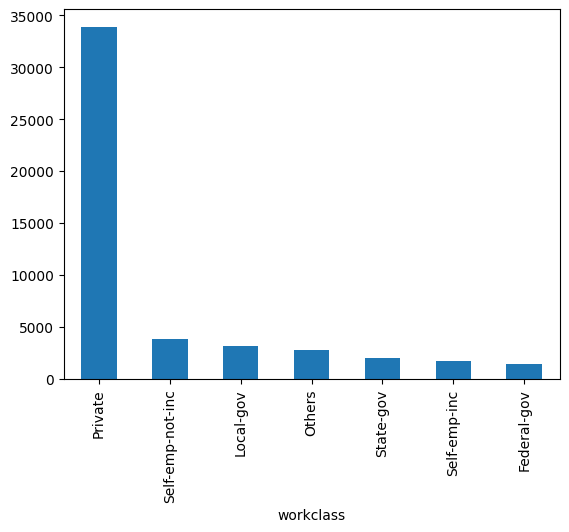

In [17]:
data.workclass.value_counts().sort_values(ascending=False).plot(kind="bar")

In [18]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [19]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


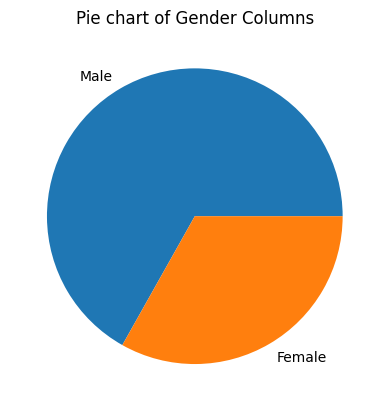

In [20]:
data["gender"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Pie chart of Gender Columns")
plt.ylabel("")
plt.show()

In [21]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
Name: count, dtype: int64


In [22]:
print(data['education'].value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [23]:
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']
data=data[data['education']!='Preschool']

<Axes: xlabel='education'>

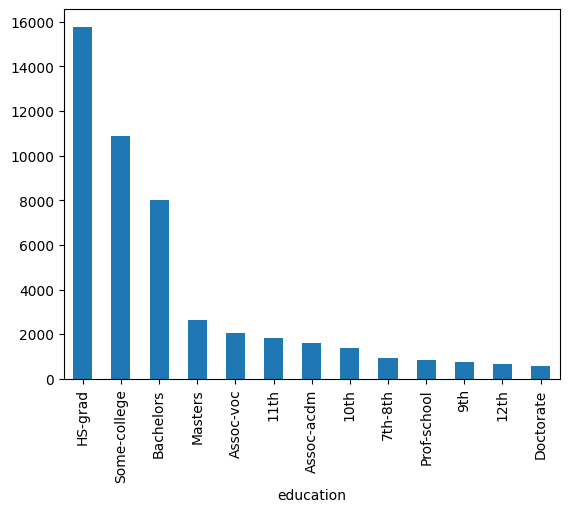

In [24]:
data['education'].value_counts().plot(kind="bar")

In [25]:
data.shape

(47972, 15)

In [26]:
if 'educational-num' in data.columns:
    data = data.drop('educational-num', axis=1)


In [27]:

data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

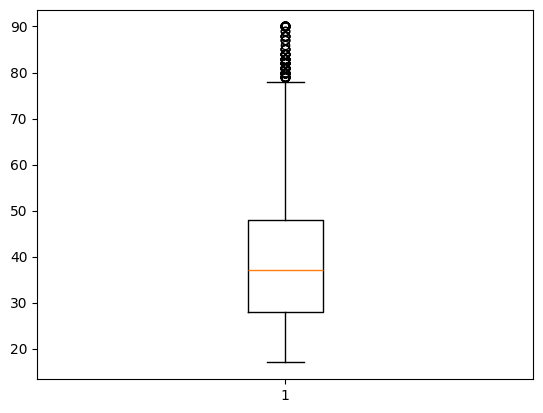

In [28]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [29]:
data=data[(data['age']<=75)&(data['age']>=17)]

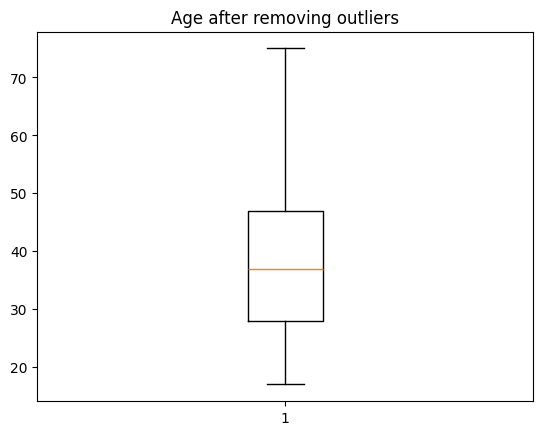

In [30]:
plt.boxplot(data['age'])
plt.title("Age after removing outliers")
plt.show()

In [31]:

# Separate encoders for each categorical column
education_le = LabelEncoder()
workclass_le = LabelEncoder()
gender_le = LabelEncoder()
occupation_le = LabelEncoder()

# Fit and transform each column separately
data['education'] = education_le.fit_transform(data['education'])
data['workclass'] = workclass_le.fit_transform(data['workclass'])
data['gender'] = gender_le.fit_transform(data['gender'])
data['occupation'] = occupation_le.fit_transform(data['occupation'])



In [32]:
import joblib

encoders = {
    'education': education_le,
    'workclass': workclass_le,
    'gender': gender_le,
    'occupation': occupation_le
}

joblib.dump(encoders, 'encoders.pkl')
print("✅ Saved as encoders.pkl")


✅ Saved as encoders.pkl


In [33]:

# Encode target
data['income'] = encoder.fit_transform(data['income'])

NameError: name 'encoder' is not defined

In [ ]:
# 5. Select only 5 features
selected_features = ['age', 'education', 'workclass', 'hours-per-week', 'gender', 'occupation']
X = data[selected_features]
Y = data['income']



In [ ]:
X

,age,education,workclass,hours-per-week,gender,occupation
0,25,1,3,40,1,6
1,38,9,3,50,1,4
2,28,5,1,40,1,11
3,44,12,3,40,1,6
4,18,12,2,30,0,8
...,...,...,...,...,...,...
48837,27,5,3,38,0,13
48838,40,9,3,40,1,6
48839,58,9,3,40,0,0
48840,22,9,3,20,1,0


In [ ]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 47619, dtype: int32

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


🔍 Training and Evaluating: LogisticRegression
✅ Accuracy: 0.7578
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      7206
           1       0.51      0.17      0.25      2318

    accuracy                           0.76      9524
   macro avg       0.64      0.56      0.55      9524
weighted avg       0.71      0.76      0.71      9524



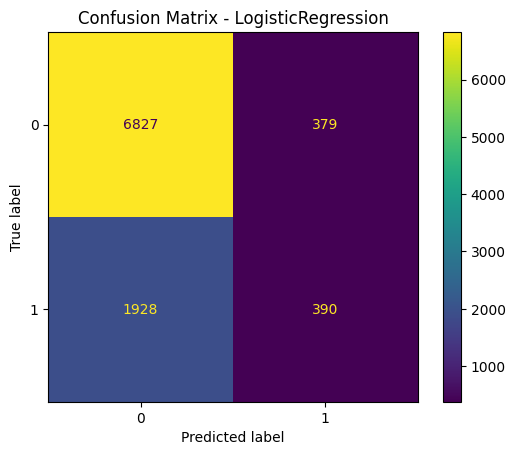


🔍 Training and Evaluating: RandomForest
✅ Accuracy: 0.7823
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7206
           1       0.56      0.47      0.51      2318

    accuracy                           0.78      9524
   macro avg       0.70      0.68      0.69      9524
weighted avg       0.77      0.78      0.78      9524



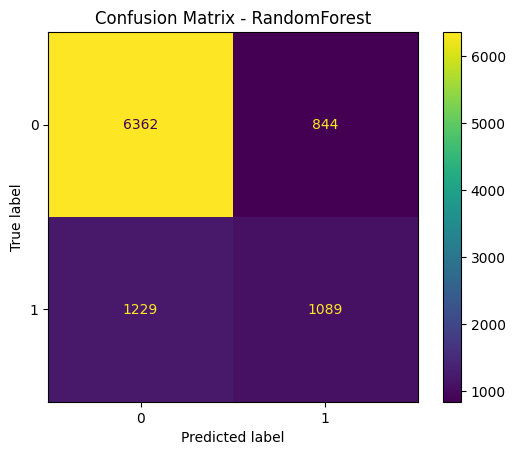


🔍 Training and Evaluating: KNN
✅ Accuracy: 0.7883
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      7206
           1       0.58      0.47      0.52      2318

    accuracy                           0.79      9524
   macro avg       0.71      0.68      0.69      9524
weighted avg       0.78      0.79      0.78      9524



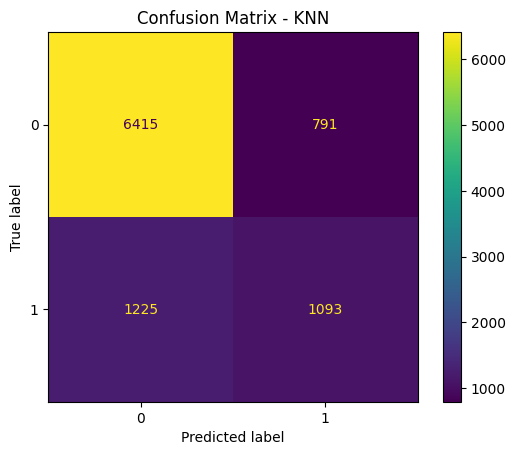


🔍 Training and Evaluating: SVM
✅ Accuracy: 0.7908
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7206
           1       0.63      0.33      0.44      2318

    accuracy                           0.79      9524
   macro avg       0.72      0.64      0.65      9524
weighted avg       0.77      0.79      0.77      9524



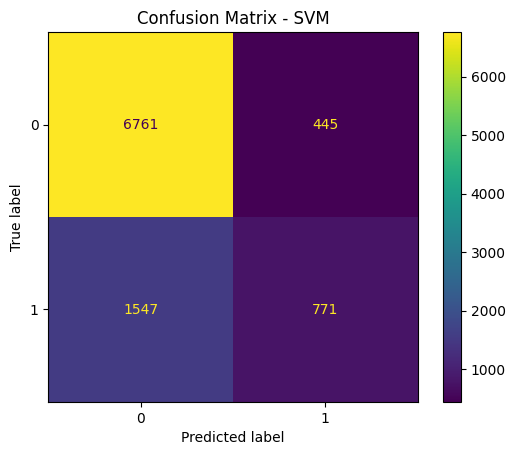


🔍 Training and Evaluating: GradientBoosting
✅ Accuracy: 0.8148
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7206
           1       0.68      0.46      0.55      2318

    accuracy                           0.81      9524
   macro avg       0.76      0.69      0.71      9524
weighted avg       0.80      0.81      0.80      9524



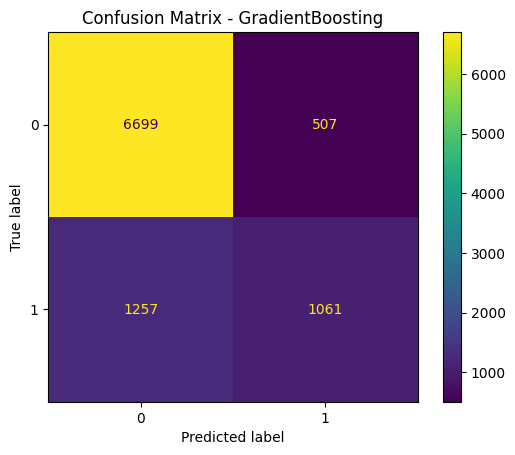


📦 Best model 'GradientBoosting' saved as 'best_model.pkl'


In [ ]:
# 9. Define Models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# 10. Train & Evaluate
results = {}

for name, model in models.items():
    print(f"\n🔍 Training and Evaluating: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Optional: Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# 11. Save the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
print(f"\n📦 Best model '{best_model_name}' saved as 'best_model.pkl'")

In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

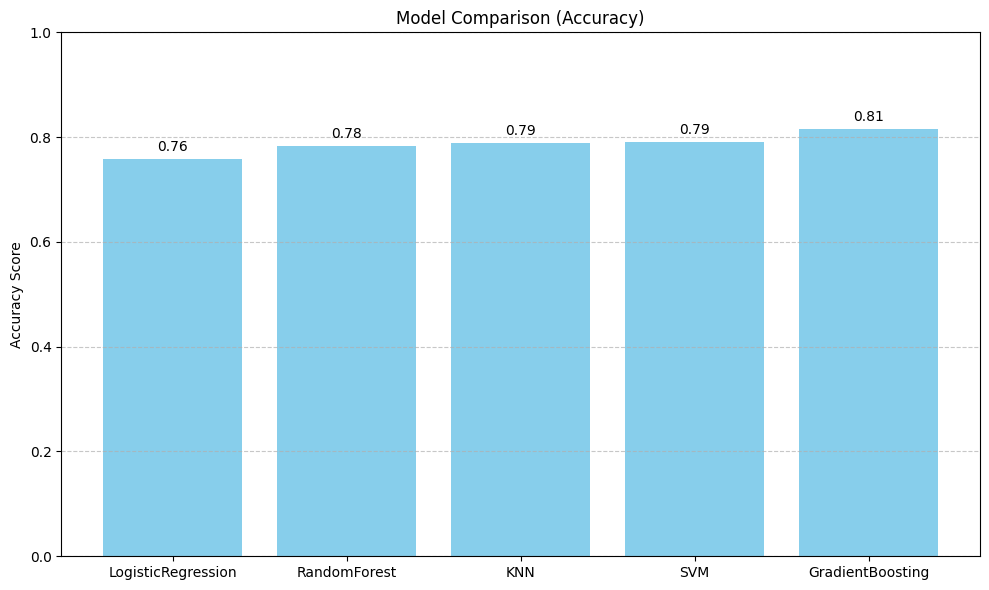

In [ ]:
# Plot Accuracy Comparison Bar Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison (Accuracy)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
